### The goal of this project is to understand the wine ratings in terms of taste, value and popularity based on different types of wine such as Red wine, White wine etc.

In [40]:
import pandas as pd
import numpy as np

I have used pandas and numpy libraries and imported it as modules to use certian functionalities defined in these packages.

Pandas library is used to read data in jupyter notebook.

In [41]:
# using pandas I have used red-excel function to read excel data here
wine = pd.read_excel('WineRating.xls')

Let us look at first 5 rows in the wine data set.

In [42]:
# head function will give the top records in the winequalit data set
wine.head(5)

,WineName,Store,Variety,Type,Cost,Review,ReviewDate,TasteRating,ValueRating
0,2008 Oreana Syrah Project Happiness,Whole Foods,Syrah,Red,5.99,Skip It,2011-02-18,3,10.0
1,2009 Aquila d'Oro Toscana,Wine Merchant,Blend,Red,3.99,Skip It,2011-06-08,3,10.0
2,2008 Estancia Cabernet Sauvignon,Costco,Cabernet Sauvignon,Red,10.99,Skip It,2011-02-24,4,7.0
3,2008 Pure Love Wines Shiraz Layer Cake,Whole Foods,Shiraz,Red,11.99,Skip It,2011-02-24,4,7.0
4,2009 Bodegas Don Miguel Gascón Malbec,Wine Merchant,Malbec,Red,10.99,Skip It,2011-03-21,4,7.0


Info() function gives the structure of the data including the data type for each column used in the table.

In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 9 columns):
WineName       838 non-null object
Store          838 non-null object
Variety        838 non-null object
Type           838 non-null object
Cost           838 non-null float64
Review         838 non-null object
ReviewDate     838 non-null datetime64[ns]
TasteRating    838 non-null int64
ValueRating    837 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.0+ KB


##### Below function calculates the average of values. Below function catches error if user inputs invalid data type


In [44]:

def average(*args):
    try:
        p = 0
        summ = 0
        for i in args:
            summ += i
            p = p + 1
        c = summ/p
        return c
    except TypeError:
        print('One or more of your provided values is of the wrong type')
    pass
        

#print(average(8.7,6.8,9.0))

args = wine['ValueRating'].tolist()
#print(average(1,2,4,5))
#print(args))
#print (type(wine['ValueRating']))
#print (type(args[0]))

#print (average(*args))
    

Below line of code provides us the number of null values in each individual column withtin wine table.
It can be seen that ValueRating has 1 null value 

In [45]:
# Calculate sum of null values within each column
wine.isnull().sum()

WineName       0
Store          0
Variety        0
Type           0
Cost           0
Review         0
ReviewDate     0
TasteRating    0
ValueRating    1
dtype: int64

dropna() function allows us to drop null values in rows. After dropping null values I have got new table wine_redefined that does not have any null values

In [46]:
wine_refined = wine.dropna()

Let us check null values in wine_refined data set

In [47]:
wine_refined.isnull().sum()

WineName       0
Store          0
Variety        0
Type           0
Cost           0
Review         0
ReviewDate     0
TasteRating    0
ValueRating    0
dtype: int64

Let us look at the average of Value Rating column. Average rating for a wine is 6.759 on a scale of 10

In [48]:
# I have used average function that is defined above and the value_rating (list) is an input to the average function
value_rating = wine_refined['ValueRating'].tolist()
print (average(*value_rating))

6.7592592592592595


Let us look at the average of Taste Rating column. Average rating for a wine is 7.6 on a scale of 10

In [49]:
# I have used average function that is defined above and the taste_rating (list) is an input to the average function
taste_rating = wine_refined['TasteRating'].tolist()
print (average(*taste_rating))

7.602150537634409


Let us look at the average of Cost column. Average Cost for a wine is $13.43.

In [50]:
cost = wine_refined['Cost'].tolist()
print (average(*cost))

13.43364396654704


#### In the original dataset Winename column consists of concatenated strings of year and wine name. I have separeated year part from this string and created separate columns of year and wine name.

In [51]:
# Converting panda series into a list
winename = wine_refined['WineName'].tolist()

# Splitting the string into a list of items
year = []
title = []
for k in winename:
    splitting = k.split(" ")
    year.append(splitting[0])
    title.append(splitting[1:])

# Joining the items in the list into a string
titles = []
for i in title:
    p = " ".join(str(x) for x in i)
    titles.append(p)
    
# Converting list of items in a panda series
years = pd.Series(year)
titles_1 = pd.Series(titles)
#print(titles_1)
#print(years)
#print(type(titles))
#print(type(titles))

#### I have derived new column Popularity which is an addition of ValueRating and TasteRating column.  Popularity is measured on a scale of 20. Higher the score of a wine type then higher the popularity of that wine.

In [52]:
Popularity = wine_refined['TasteRating'] + wine_refined['ValueRating']

##### I have created a fresh data set  wine_1 which is cleaned and does not have concatenated string. Using to_csv function I have written a .csv file.

In [53]:
wine_1 = pd.concat([years, titles_1, wine_refined.loc[:,'Store':], Popularity], axis = 1).rename(columns={0:'Year',1: 'Wine_Name', 'Type':'Wine_Type', 2:'Popularity'})
print (wine_1)
wine_1.to_csv('Refined_Winery_Dataset.csv')

     Year                                          Wine_Name          Store  \
0    2008                     Oreana Syrah Project Happiness    Whole Foods   
1    2009                               Aquila d'Oro Toscana  Wine Merchant   
2    2008                        Estancia Cabernet Sauvignon         Costco   
3    2008                  Pure Love Wines Shiraz Layer Cake    Whole Foods   
4    2009                   Bodegas Don Miguel Gascón Malbec  Wine Merchant   
5    2009                      Marqués de Montañana Garnacha     Total Wine   
6    2009             Trader Joe's Growers Reserve Zinfandel     Total Wine   
7    2007         Cantina Zaccagnini Montepulciano d'Abruzzo     Total Wine   
8    2008            Caves do Salgueiral Douro Azul Portugal   Market Wines   
9    2008  Chateau St Michelle Cabernet Sauvignon Indian ...  Wine Merchant   
10   2008                   Epicuro Nero d'Avola Sicilia IGT   Trader Joe's   
11   2008                  Padrillos Malbec (Ernesto

In [54]:
top_10 = wine_1.sort_values('Popularity', ascending= False).head(10)

### wine_1 dataset is sorted in a descending order based on popularity column and let us look at top 10 popular wines.

In [55]:
print (top_10)

     Year                                          Wine_Name          Store  \
621  2008             Willamette Valley Vineyards Pinot Noir    Whole Foods   
435  2010               Château Bonnet Entre-Deux-Mers White  Wine Merchant   
706  2011         Bonny Doon Vineyard Central Coast Albarino     Total Wine   
668  2010           Fuse Wine Napa Valley Cabernet Sauvignon          Other   
754  2004                                Cyan La Calera Toro     Total Wine   
464  2010             Lucien Albrecht Gewurztraminer Reserve  Wine Merchant   
691  2010                       San Polo Rosso di Montalcino     Total Wine   
689  2010  Robert Mondavi Winery Napa Valley Cabernet Sau...   Market Wines   
555  2012                       Cline Cellars Mourvedre Rosé     Total Wine   
256  2011    Mezzacorona Pinot Grigio Vigneti delle Dolomiti    Whole Foods   

          Variety Wine_Type   Cost           Review ReviewDate  TasteRating  \
621         Blend       Red   5.99         Bulk Buy

##### Let us look at the average of TasteRating for each of the wine type. I have converted pandas series into a list and will use the list to visualize bar chart.


In [56]:
hh = wine_1.groupby('Wine_Type')[['TasteRating']].mean().reset_index()

wine_type = hh.iloc[:,[0]]['Wine_Type'].tolist()
taste = hh.iloc[:,[1]]['TasteRating'].tolist()

type_taste_rating = [wine_type, taste]
print(type_taste_rating)


[['Cider Wine', 'Dessert', 'Port', 'Red', 'Rosé', 'Sparkling', 'White'], [8.0, 7.625, 7.8, 7.643356643356643, 7.516129032258065, 7.5, 7.5]]


##### Let us look at the average of ValueRating for each of the wine type. I have converted pandas series into a list and will use the list to visualize bar chart.

In [57]:
hh1 = wine_1.groupby('Wine_Type')[['ValueRating']].mean().reset_index()

wine_type1 = hh1.iloc[:,[0]]['Wine_Type'].tolist()
value = hh1.iloc[:,[1]]['ValueRating'].tolist()

type_value_rating = [wine_type1, value]
print(type_value_rating)


[['Cider Wine', 'Dessert', 'Port', 'Red', 'Rosé', 'Sparkling', 'White'], [6.0, 6.375, 4.4, 6.658216783216783, 7.0, 7.115384615384615, 7.051546391752577]]


##### Let us look at the Average Cost for each of the wine type. I have converted pandas series into a list and will use the list to visualize bar chart.

In [58]:
hh2 = wine_1.groupby('Wine_Type')[['Cost']].mean().reset_index()

wine_type2 = hh2.iloc[:,[0]]['Wine_Type'].tolist()
cost = hh2.iloc[:,[1]]['Cost'].tolist()

type_cost_rating = [wine_type2, cost]
print(type_cost_rating)


[['Cider Wine', 'Dessert', 'Port', 'Red', 'Rosé', 'Sparkling', 'White'], [11.99, 14.364999999999997, 18.79, 14.044562937062809, 12.11935483870968, 11.336153846153849, 11.954484536082468]]


Let us import matplotlib to visualize bar charts

In [59]:
import matplotlib.pyplot as plt

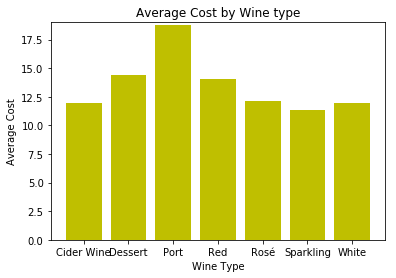

In [60]:
plt.bar(type_cost_rating[0], type_cost_rating[1], facecolor = 'y')
plt.ylim(0,19)
plt.xlabel('Wine Type')
plt.ylabel('Average Cost')
plt.title('Average Cost by Wine type')
plt.show()

##### Above bar chart shows that average cost is highest for Port Wine type. Sparkling wine type has low average cost of all wine types.

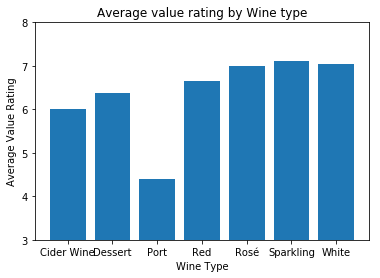

In [61]:
plt.bar(type_value_rating[0], type_value_rating[1])
plt.ylim(3,8)
plt.xlabel('Wine Type')
plt.ylabel('Average Value Rating')
plt.title('Average value rating by Wine type')
plt.show()

##### Above bar chart shows that average value rating is highest for Sparkling Wine type. Port wine type has low average average value rating of all wine types.

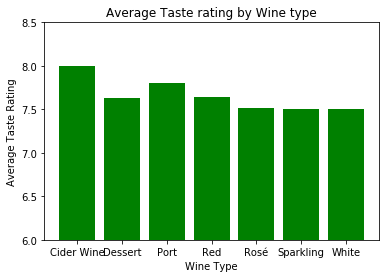

In [62]:
plt.bar(type_taste_rating[0], type_taste_rating[1], facecolor = 'g')
plt.ylim(6,8.5)
plt.xlabel('Wine Type')
plt.ylabel('Average Taste Rating')
plt.title('Average Taste rating by Wine type')
plt.show()

##### Above bar chart shows that average taste rating is highest for Cider Wine type. 